In [1]:
import numpy as np
import pandas as pd
import pathlib as pl
from datetime import datetime
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
import seaborn as sb

In [2]:
M = pd.read_csv("matrix.csv",index_col=0)
T = pd.read_csv("test.csv",index_col=0)
B = pd.read_csv("diff.csv")
M.index = pd.to_datetime(M.index)
T.index = pd.to_datetime(T.index)

In [3]:
T_MAX = T.max(); T_MIN = T.min()
M_MAX = M.max(); M_MIN = M.min()
#MEAN = T.mean(); STD = T.std()

In [4]:
M_normal = (M-T_MIN)/(T_MAX-T_MIN)
T_normal = (T-T_MIN)/(T_MAX-T_MIN)

In [5]:
#M_normal = (M-MEAN)/STD
#T_normal = (T-MEAN)/STD

In [6]:
M_A = np.array(M_normal)
T_A = np.array(T_normal)

In [7]:
status_matrix=M_A.T

In [8]:
np.linalg.norm(status_matrix[:,0]-status_matrix[:,1])

0.4195863948758531

In [9]:
dis_vectors=[]
for j in range(status_matrix.shape[1]):
    dis_vectors.append([np.linalg.norm(status_matrix[:,j]-status_matrix[:,i]) for i in range(status_matrix.shape[1])]) 

In [10]:
G= np.array(dis_vectors)

In [11]:
G_inv=np.linalg.inv(G)

In [12]:
T_A

array([[0.89273922, 0.24231927, 0.61486486, ..., 0.28409393, 0.37545308,
        0.40634536],
       [0.9042906 , 0.24504328, 0.6306306 , ..., 0.24577622, 0.39366791,
        0.42237068],
       [0.65346541, 0.24231927, 0.41891895, ..., 0.2745124 , 0.33447103,
        0.35826999],
       ...,
       [0.74257431, 0.64737594, 0.79054042, ..., 0.60353863, 0.72175182,
        0.72305671],
       [0.88283835, 0.66239601, 0.91441429, ..., 0.55880116, 0.76278782,
        0.78724853],
       [0.82673271, 0.68970891, 0.84459459, ..., 0.60992943, 0.83119535,
        0.83540411]])

In [13]:
w=np.array([[np.linalg.norm(T_A[0,:]-status_matrix[:,i])] for i in range(status_matrix.shape[1])])

In [14]:
w

array([[0.88566753],
       [1.12527686],
       [2.44188038],
       [2.85042931],
       [1.9121077 ],
       [1.0433011 ],
       [1.70402703],
       [0.91942875],
       [1.39855582],
       [2.27777976],
       [2.91854426],
       [1.57937671],
       [3.23602324],
       [2.73992197],
       [3.31818031],
       [3.14568896],
       [3.04530661],
       [2.02286076],
       [2.4444386 ],
       [2.41520245],
       [1.64269566],
       [1.54049968],
       [2.34014918],
       [1.69857714],
       [1.72147034],
       [3.16963124],
       [2.40569548],
       [1.25060834],
       [2.04363436],
       [1.87313454],
       [2.56613186],
       [1.19978796],
       [1.76048027],
       [1.8398056 ],
       [1.57794432],
       [2.20025251],
       [2.41709165],
       [1.72149812],
       [1.60457782],
       [1.32847266],
       [1.48073829],
       [1.4060874 ],
       [2.25124011],
       [1.85483031],
       [1.9187299 ],
       [2.00476646],
       [1.96424932],
       [1.443

In [15]:
np.dot(status_matrix,np.dot(G_inv,w))[:,0]

array([0.88250235, 0.28714964, 0.61903768, 0.85713838, 0.88180199,
       0.80795291, 0.21268578, 0.88217677, 0.80247349, 0.79967898,
       0.80094946, 0.82813004, 0.2057567 , 0.43414655, 0.49527153,
       0.47564982, 0.47736427, 0.17147502, 0.1929045 , 0.19332955,
       0.3928035 , 0.57139226])

In [16]:
Y_list=[]
for j in range(len(T)):
    w=np.array([[np.linalg.norm(T_A[j,:]-status_matrix[:,i])] for i in range(status_matrix.shape[1])])
#    w=w/w.sum()
    Y_list.append(np.dot(status_matrix,np.dot(G_inv,w))[:,0])
Target_array = np.array(Y_list)

In [17]:
Target = pd.DataFrame(Target_array,index=T.index,columns=T.columns)

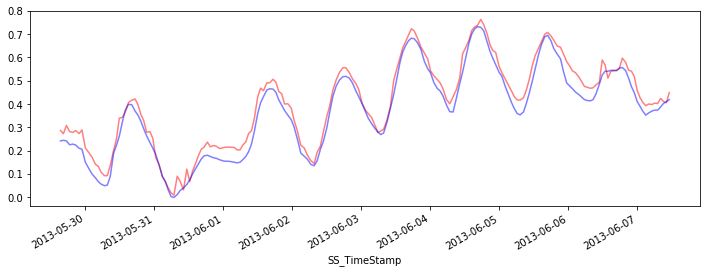

In [18]:
import pylab
pylab.rcParams['figure.figsize'] = (12.0, 4.0)
Target.iloc[:200,1].plot(alpha=0.5,color="red")
T_normal.iloc[:200,1].plot(alpha=0.5,color ="blue")
plt.show()

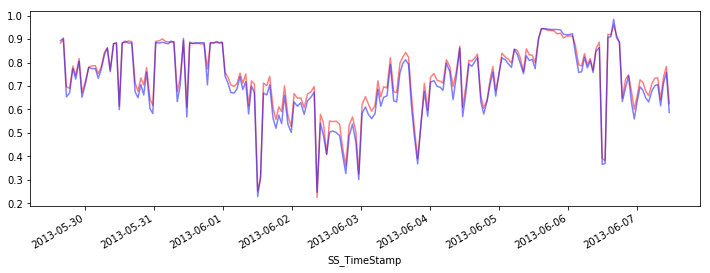

In [19]:
Target.iloc[:200,0].plot(alpha=0.5,color="red")
T_normal.iloc[:200,0].plot(alpha=0.5,color ="blue")
plt.show()

In [20]:
T.shape

(819, 22)

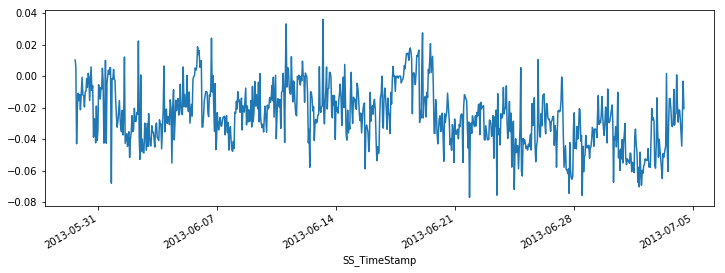

In [21]:
(T_normal-Target).iloc[:,0].plot()

In [22]:
B.index = T_normal.index

In [23]:
#B_JF = T_normal*(MAX-MIN)-Target*(MAX-MIN)
B_JF = T-(Target*(T_MAX-T_MIN)+T_MIN)

In [24]:
#B_JF = (T_normal*STD+MEAN)-(Target*STD+MEAN)

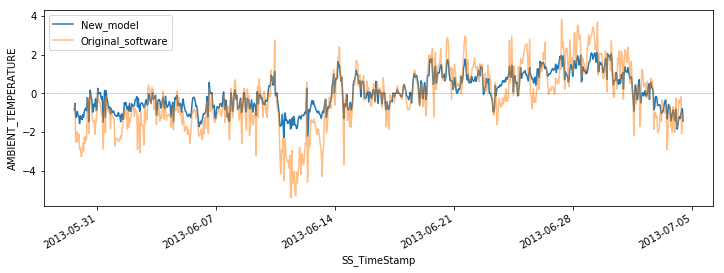

In [31]:
B_JF.iloc[:,1].plot(label="New_model")
B.iloc[:,1].plot(alpha =0.5,label="Original_software")
plt.axhline(y=0,linestyle='--',color='black',alpha= 0.5,lw=0.5)
plt.legend(loc='best')
plt.ylabel(B.columns[1])
plt.show()
#plt.xlabel

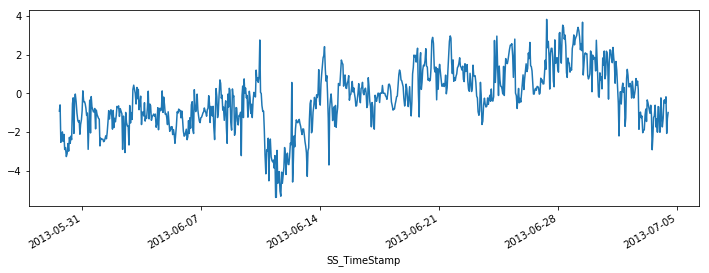

In [26]:
B.iloc[:,1].plot()

In [27]:
w.shape

(88, 1)

In [28]:
status_matrix.shape

(22, 88)

In [30]:
import h5py as h5

In [32]:
h5.File?

Init signature: h5.File(name, mode=None, driver=None, libver=None, userblock_size=None, swmr=False, **kwds)
Docstring:      Represents an HDF5 file.
Init docstring:
Create a new file object.

See the h5py user guide for a detailed explanation of the options.

name
    Name of the file on disk.  Note: for files created with the 'core'
    driver, HDF5 still requires this be non-empty.
mode
    r        Readonly, file must exist
    r+       Read/write, file must exist
    w        Create file, truncate if exists
    w- or x  Create file, fail if exists
    a        Read/write if exists, create otherwise (default)
driver
    Name of the driver to use.  Legal values are None (default,
    recommended), 'core', 'sec2', 'stdio', 'mpio'.
libver
    Library version bounds.  Currently only the strings 'earliest'
    and 'latest' are defined.
userblock
    Desired size of user block.  Only allowed when creating a new
    file (mode w, w- or x).
swmr
    Open the file in SWMR read mode. Only use

In [34]:
np.save("/home/techstar/demoweb/static/shdky/G_inv.npy",G_inv)

In [35]:
ginv= np.load("/home/techstar/demoweb/static/shdky/G_inv.npy")

In [75]:
np.save("/home/techstar/demoweb/static/shdky/status_matrix.npy",status_matrix)

In [64]:
T_min_max= pd.concat((T_MIN,T_MAX),keys=["T_min","T_max"],axis =1)

In [67]:
T_min_max.to_csv("/home/techstar/demoweb/static/shdky/T_min_max.csv")

In [72]:
Tmm=pd.read_csv("/home/techstar/demoweb/static/shdky/T_min_max.csv",index_col=0,float_precision="round_trip")

In [73]:
Tmm==T_min_max

,T_min,T_max
GROSS_LOAD,True,True
AMBIENT_TEMPERATURE,True,True
SUCTION_STRAINER_DP,True,True
SUCTION_PRESSURE_1,True,True
SUCTION_TEMP_1,True,True
DISCHARGE_PRESSURE,True,True
PUMP_DELTA_PRESS_CV,True,True
DISCHARGE_TEMP_1,True,True
FLOW_1,True,True
FLOW_2,True,True


In [74]:
M

,GROSS_LOAD,AMBIENT_TEMPERATURE,SUCTION_STRAINER_DP,SUCTION_PRESSURE_1,SUCTION_TEMP_1,DISCHARGE_PRESSURE,PUMP_DELTA_PRESS_CV,DISCHARGE_TEMP_1,FLOW_1,FLOW_2,...,MOTOR_OB_TEMP_1,MOTOR_IB_TEMP_1,MOTOR_STATOR_TEMP_1,MOTOR_STATOR_TEMP_2,MOTOR_STATOR_TEMP_3,PUMP_IB_TEMP_1,PUMP_OB_TEMP_1,PUMP_OB_TEMP_2,IB_SEAL_DRAIN_TEMP,OB_SEAL_DRAIN_TEMP
SS_TimeStamp,,,,,,,,,,,,,,,,,,,,,
2012-04-28 08:00:00,921.995606,21.048258,21.104055,1.309233,184.803360,2.698095,1.388862,184.898102,1351.695435,1350.551514,...,36.326752,55.523941,72.360931,68.754166,67.618073,57.579952,66.991425,57.944439,42.268623,44.770218
2012-04-29 04:00:00,951.180176,21.177015,22.142160,1.321446,184.857468,2.695652,1.374206,184.884567,1382.907104,1382.907104,...,36.559559,56.616867,73.184753,69.446472,68.401550,59.350704,65.660217,55.263782,43.007233,44.588692
2012-04-29 13:00:00,600.964233,24.320034,9.425379,0.952003,166.573791,2.536883,1.584881,166.688202,899.909851,898.149475,...,39.089245,56.382629,66.469322,63.742615,62.706017,61.148468,71.896812,60.549099,43.655281,43.609921
2012-04-29 16:00:00,544.993652,23.753040,7.517099,0.897426,163.378662,2.515511,1.618085,163.566895,792.682983,793.182190,...,37.698006,54.353374,63.579613,60.985588,60.001953,60.757565,71.772606,59.975914,44.128441,44.258087
2012-05-24 00:00:00,698.513000,23.649958,12.661822,1.064973,173.047836,2.610161,1.545188,173.095047,1026.800049,1028.329712,...,34.025349,51.233871,62.653870,59.832619,58.686562,59.298618,71.485016,61.050743,42.495373,43.389568
2012-05-25 05:00:00,849.633545,20.147156,18.539330,1.170310,178.474289,2.609551,1.439241,178.501343,1262.449951,1261.211426,...,35.602528,53.391205,68.773766,65.510155,64.179512,58.022568,68.323196,59.480949,42.352837,44.296986
2012-05-25 19:00:00,724.899109,24.448896,13.409870,1.095506,174.531784,2.624817,1.529312,174.531784,1059.514160,1060.994507,...,35.654263,52.897244,65.712402,62.790752,61.513351,59.324669,71.040619,61.513351,42.229752,43.940460
2012-06-09 04:00:00,935.988159,24.577785,23.699318,1.251221,182.469055,2.618100,1.366878,182.529922,1414.692261,1412.766968,...,34.852638,54.925606,71.779137,68.290550,66.926163,58.152740,71.354301,63.729572,42.929478,51.266342
2012-06-10 03:00:00,816.850830,26.640553,18.172937,1.151991,177.798859,2.602834,1.450843,177.879883,1242.591309,1238.809448,...,35.369789,54.145309,69.002350,65.660217,64.381683,58.517292,72.060226,64.799110,43.085007,51.155907


In [30]:
T_MIN

GROSS_LOAD               519.407043
AMBIENT_TEMPERATURE       16.725161
SUCTION_STRAINER_DP        8.707865
SUCTION_PRESSURE_1         0.846666
SUCTION_TEMP_1           160.636734
DISCHARGE_PRESSURE         2.446507
PUMP_DELTA_PRESS_CV        1.257267
DISCHARGE_TEMP_1         160.690475
FLOW_1                   858.557556
FLOW_2                   862.256653
DISCHARGE_FLOW_COMMON    871.435730
MOTOR_CURRENT             67.503662
MOTOR_OB_TEMP_1           31.234760
MOTOR_IB_TEMP_1           46.196854
MOTOR_STATOR_TEMP_1       58.803753
MOTOR_STATOR_TEMP_2       56.408657
MOTOR_STATOR_TEMP_3       55.159718
PUMP_IB_TEMP_1            55.003647
PUMP_OB_TEMP_1            67.017540
PUMP_OB_TEMP_2            59.975914
IB_SEAL_DRAIN_TEMP        38.060318
OB_SEAL_DRAIN_TEMP        36.533684
dtype: float64